In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 
    'worm'
]

Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Model 1

In [4]:
class BaselineConvolutionModel(nn.Module):
    def __init__(self):
        super(BaselineConvolutionModel,self).__init__()
        self.conv_layer_one = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3 , stride=1, padding=1)
        self.conv_layer_two = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, stride=1, padding=1)
        self.conv_layer_three = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, stride=1, padding=1)
        self.conv_layer_four = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, stride=1, padding=1)
        self.conv_layer_five = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, stride=1, padding=1)
        self.conv_layer_six = nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3, stride=1, padding=1)
    
        self.batchNorm = nn.BatchNorm2d(3)
        
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)             
    def forward(self, x):
        x = self.batchNorm(x)
        x = self.conv_layer_one(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_two(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_three(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_four(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_five(x)
        x = F.elu(x)
        x = F.avg_pool2d(x,(2,2))
        
        x = self.conv_layer_six(x)
        x = F.elu(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.elu(x)
        x = self.fc2(x)
        x = F.elu(x)
        x = self.fc3(x)
        return x

## Model 2

In [5]:
class ConvutionModelAddedLayersBatchNorm(nn.Module):
    def __init__(self):
        super(ConvutionModelAddedLayersBatchNorm, self).__init__()
        self.conv_layer_one = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3 , stride=1, padding=1)
        self.conv_layer_two = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, stride=1, padding=1)
        self.conv_layer_three = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, stride=1, padding=1)
        self.conv_layer_four = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, stride=1, padding=1)
        self.conv_layer_five = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, stride=1, padding=1)
        self.conv_layer_six = nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3, stride=1, padding=1)
        self.conv_layer_seven = nn.Conv2d(in_channels=1024,out_channels=2048,kernel_size=3, stride=1, padding=1)
    
        self.batchNorm3 = nn.BatchNorm2d(3)
        self.batchNorm512 = nn.BatchNorm2d(512)
        
        self.fc1 = nn.Linear(8192, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 512)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 100)
  
        
    def forward(self, x):
        x = self.batchNorm3(x)
        x = self.conv_layer_one(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_two(x)
        x = F.elu(x)
        
        x = self.conv_layer_three(x)
        x = F.elu(x)
        
        x = self.conv_layer_four(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_five(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.batchNorm512(x)
        x = self.conv_layer_six(x)
        x = F.elu(x)
        x = F.max_pool2d(x,(2,2))
        
        x = self.conv_layer_seven(x)
        x = F.elu(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.elu(x)
        x = self.fc2(x)
        x = F.elu(x)
        x = self.fc3(x)
        x = F.elu(x)
        x = self.fc4(x)
        x = F.elu(x)
        x = self.fc5(x)
        x = F.elu(x)
        x = self.fc6(x)
        return x

## Ensemble

In [6]:
# adapted from: https://discuss.pytorch.org/t/custom-ensemble-approach/52024/4
class ConvolutionalEnsemble(nn.Module):
    def __init__(self, modelA, modelB, nb_classes=100):
        super(ConvolutionalEnsemble, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        # Remove last linear layer
        self.modelA.fc = nn.Identity()
        self.modelB.fc = nn.Identity()
        
        # Create new classifier
#         self.classifier = nn.Linear(100 + 100, nb_classes)
        
    def forward(self, x):
        x1 = self.modelA(x.clone())  
        x1 = x1.view(x1.size(0), -1)
        x2 = self.modelB(x)
        x2 = x2.view(x2.size(0), -1)
#         x = torch.cat((x1, x2), dim=1)
        
#         x = self.classifier(F.sigmoid(x))
#         x = (x1 + x2) / 2
        x = torch.max(x1,x2)
        return x

## Define Epochs

In [7]:
epochs = 100

## Model 1 Training

In [8]:
modelA = BaselineConvolutionModel()
modelA.to(device)
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(modelA.parameters(), lr=0.001, momentum=0.9) 

In [9]:
avg_losses = []   # Avg. losses.
# epochs = 20      # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = modelA(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.605
[epoch: 0, i:  1999] avg mini-batch loss: 4.607
[epoch: 0, i:  2999] avg mini-batch loss: 4.606
[epoch: 0, i:  3999] avg mini-batch loss: 4.607
[epoch: 0, i:  4999] avg mini-batch loss: 4.607
[epoch: 0, i:  5999] avg mini-batch loss: 4.607
[epoch: 0, i:  6999] avg mini-batch loss: 4.606
[epoch: 0, i:  7999] avg mini-batch loss: 4.608
[epoch: 0, i:  8999] avg mini-batch loss: 4.606
[epoch: 0, i:  9999] avg mini-batch loss: 4.606
[epoch: 0, i: 10999] avg mini-batch loss: 4.603
[epoch: 0, i: 11999] avg mini-batch loss: 4.586
[epoch: 1, i:   999] avg mini-batch loss: 4.532
[epoch: 1, i:  1999] avg mini-batch loss: 4.495
[epoch: 1, i:  2999] avg mini-batch loss: 4.462
[epoch: 1, i:  3999] avg mini-batch loss: 4.441
[epoch: 1, i:  4999] avg mini-batch loss: 4.402
[epoch: 1, i:  5999] avg mini-batch loss: 4.372
[epoch: 1, i:  6999] avg mini-batch loss: 4.328
[epoch: 1, i:  7999] avg mini-batch loss: 4.301
[epoch: 1, i:  8999] avg mini-batch loss

## Model 1 Training Loss Plot

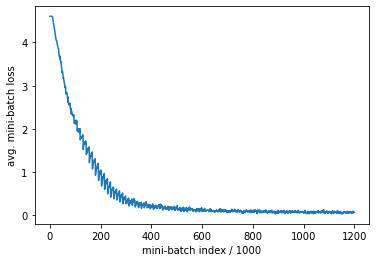

In [10]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

## Evaluate Model 1 on Test Set

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = modelA(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 46 %


## Evaluate Model 1 Across Classes

In [21]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = modelA(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 71 %
Accuracy of aquarium_fish : 61 %
Accuracy of  baby : 39 %
Accuracy of  bear : 23 %
Accuracy of beaver : 38 %
Accuracy of   bed : 54 %
Accuracy of   bee : 53 %
Accuracy of beetle : 48 %
Accuracy of bicycle : 62 %
Accuracy of bottle : 71 %
Accuracy of  bowl : 27 %
Accuracy of   boy : 24 %
Accuracy of bridge : 51 %
Accuracy of   bus : 44 %
Accuracy of butterfly : 29 %
Accuracy of camel : 41 %
Accuracy of   can : 44 %
Accuracy of castle : 63 %
Accuracy of caterpillar : 33 %
Accuracy of cattle : 31 %
Accuracy of chair : 74 %
Accuracy of chimpanzee : 58 %
Accuracy of clock : 52 %
Accuracy of cloud : 54 %
Accuracy of cockroach : 74 %
Accuracy of couch : 26 %
Accuracy of  crab : 39 %
Accuracy of crocodile : 32 %
Accuracy of   cup : 70 %
Accuracy of dinosaur : 45 %
Accuracy of dolphin : 44 %
Accuracy of elephant : 32 %
Accuracy of flatfish : 46 %
Accuracy of forest : 42 %
Accuracy of   fox : 38 %
Accuracy of  girl : 21 %
Accuracy of hamster : 48 %
Accuracy of house : 31

## Model 2 Training

In [13]:
modelB = ConvutionModelAddedLayersBatchNorm()
modelB.to(device)
loss_func = nn.CrossEntropyLoss()  
opt = optim.SGD(modelB.parameters(), lr=0.001, momentum=0.9) 

In [14]:
avg_losses = []   # Avg. losses.
# epochs = 20      # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = modelB(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 4.580
[epoch: 0, i:  1999] avg mini-batch loss: 4.393
[epoch: 0, i:  2999] avg mini-batch loss: 4.240
[epoch: 0, i:  3999] avg mini-batch loss: 4.121
[epoch: 0, i:  4999] avg mini-batch loss: 3.995
[epoch: 0, i:  5999] avg mini-batch loss: 3.926
[epoch: 0, i:  6999] avg mini-batch loss: 3.803
[epoch: 0, i:  7999] avg mini-batch loss: 3.794
[epoch: 0, i:  8999] avg mini-batch loss: 3.673
[epoch: 0, i:  9999] avg mini-batch loss: 3.641
[epoch: 0, i: 10999] avg mini-batch loss: 3.567
[epoch: 0, i: 11999] avg mini-batch loss: 3.445
[epoch: 1, i:   999] avg mini-batch loss: 3.326
[epoch: 1, i:  1999] avg mini-batch loss: 3.270
[epoch: 1, i:  2999] avg mini-batch loss: 3.222
[epoch: 1, i:  3999] avg mini-batch loss: 3.137
[epoch: 1, i:  4999] avg mini-batch loss: 3.098
[epoch: 1, i:  5999] avg mini-batch loss: 3.034
[epoch: 1, i:  6999] avg mini-batch loss: 3.055
[epoch: 1, i:  7999] avg mini-batch loss: 2.920
[epoch: 1, i:  8999] avg mini-batch loss

## Model 2 Training Plot

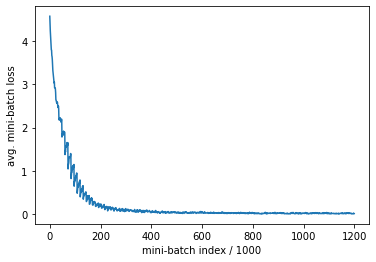

In [15]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

## Evaluate Model 2 on Test Set

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = modelB(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 45 %


## Evaluate Model 2 Across Classes

In [22]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = modelB(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 70 %
Accuracy of aquarium_fish : 62 %
Accuracy of  baby : 41 %
Accuracy of  bear : 16 %
Accuracy of beaver : 38 %
Accuracy of   bed : 35 %
Accuracy of   bee : 37 %
Accuracy of beetle : 38 %
Accuracy of bicycle : 61 %
Accuracy of bottle : 69 %
Accuracy of  bowl : 38 %
Accuracy of   boy : 32 %
Accuracy of bridge : 49 %
Accuracy of   bus : 61 %
Accuracy of butterfly : 36 %
Accuracy of camel : 31 %
Accuracy of   can : 49 %
Accuracy of castle : 58 %
Accuracy of caterpillar : 17 %
Accuracy of cattle : 39 %
Accuracy of chair : 74 %
Accuracy of chimpanzee : 59 %
Accuracy of clock : 48 %
Accuracy of cloud : 61 %
Accuracy of cockroach : 60 %
Accuracy of couch : 29 %
Accuracy of  crab : 47 %
Accuracy of crocodile : 18 %
Accuracy of   cup : 73 %
Accuracy of dinosaur : 43 %
Accuracy of dolphin : 38 %
Accuracy of elephant : 34 %
Accuracy of flatfish : 24 %
Accuracy of forest : 46 %
Accuracy of   fox : 52 %
Accuracy of  girl : 27 %
Accuracy of hamster : 43 %
Accuracy of house : 47

## Construct Ensemble

In [18]:
model = ConvolutionalEnsemble(modelA,modelB)

# Freeze these models
for param in modelA.parameters():
    param.requires_grad_(False)

for param in modelB.parameters():
    param.requires_grad_(False)
model.to(device)

ConvolutionalEnsemble(
  (modelA): BaselineConvolutionModel(
    (conv_layer_one): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_two): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_three): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_four): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_five): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_layer_six): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=1024, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=256, bias=True)
    (fc3): Linear(in_features=256, out_features=100, bias=True)
    (fc): Identity()
  )
  (modelB): ConvutionModelAddedLayersBatchNorm(
    (conv_layer_one): Conv2d(3, 32, ke

###  Evaluate Ensemble on Test Set

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


### Evaluate Ensemble Across Classes on Test Set

In [20]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apple : 73 %
Accuracy of aquarium_fish : 67 %
Accuracy of  baby : 45 %
Accuracy of  bear : 24 %
Accuracy of beaver : 38 %
Accuracy of   bed : 55 %
Accuracy of   bee : 56 %
Accuracy of beetle : 51 %
Accuracy of bicycle : 60 %
Accuracy of bottle : 75 %
Accuracy of  bowl : 33 %
Accuracy of   boy : 25 %
Accuracy of bridge : 51 %
Accuracy of   bus : 52 %
Accuracy of butterfly : 29 %
Accuracy of camel : 42 %
Accuracy of   can : 50 %
Accuracy of castle : 64 %
Accuracy of caterpillar : 31 %
Accuracy of cattle : 31 %
Accuracy of chair : 76 %
Accuracy of chimpanzee : 60 %
Accuracy of clock : 53 %
Accuracy of cloud : 60 %
Accuracy of cockroach : 73 %
Accuracy of couch : 27 %
Accuracy of  crab : 41 %
Accuracy of crocodile : 31 %
Accuracy of   cup : 73 %
Accuracy of dinosaur : 46 %
Accuracy of dolphin : 47 %
Accuracy of elephant : 33 %
Accuracy of flatfish : 46 %
Accuracy of forest : 51 %
Accuracy of   fox : 44 %
Accuracy of  girl : 20 %
Accuracy of hamster : 49 %
Accuracy of house : 37

We took the original baseline model followed by a variation of the baseline model with added layers and added batch layers. I created a classifier that took the weights from the model that maxmized prediction accuracy.